In [2]:
#1.Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#2.Load the dataset
import pandas as pd
df = pd.read_csv("Laptop_price.csv")
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512.0,11.185147,2.641094,17395.093060
1,Acer,2.912833,4,1000.0,11.311372,3.260012,31607.605920
2,Lenovo,3.241627,4,256.0,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512.0,12.280360,NaN,17436.728330
4,Acer,3.268097,32,1000.0,14.990877,4.193472,32917.990720
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000.0,12.587095,3.162399,31593.668020
996,Dell,2.780555,8,256.0,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512.0,12.666315,3.392612,16552.404780
998,Asus,1.604182,8,256.0,11.215581,3.857613,9407.473459


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  999 non-null    float64
 4   Screen_Size       999 non-null    float64
 5   Weight            996 non-null    float64
 6   Price             999 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [4]:
#2. Find missing values
print("Missing Values in the Dataset:")
print(df.isnull().sum())

Missing Values in the Dataset:
Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    1
Screen_Size         1
Weight              4
Price               1
dtype: int64


In [5]:
# Step 3: Replace missing values by Mean
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Instead of using inplace=True, perform the operation directly on the DataFrame
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Print the DataFrame after imputation
print(df)

# Print the remaining missing values to check if all are handled
print("\nMissing Values after mean imputation:")
print(df.isnull().sum())


      Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16             512.0    11.185147   
1      Acer         2.912833         4            1000.0    11.311372   
2    Lenovo         3.241627         4             256.0    11.853023   
3      Acer         3.806248        16             512.0    12.280360   
4      Acer         3.268097        32            1000.0    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4            1000.0    12.587095   
996    Dell         2.780555         8             256.0    12.679356   
997    Dell         3.200569         4             512.0    12.666315   
998    Asus         1.604182         8             256.0    11.215581   
999  Lenovo         1.711980         4             256.0    16.561498   

       Weight         Price  
0    2.641094  17395.093060  
1    3.260012  31607.605920  
2    2.029061   9291.023542  
3  

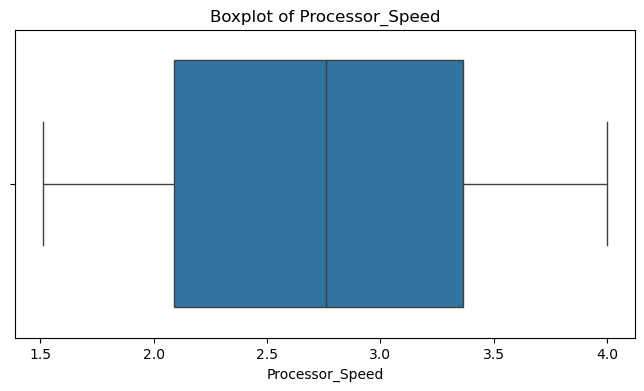

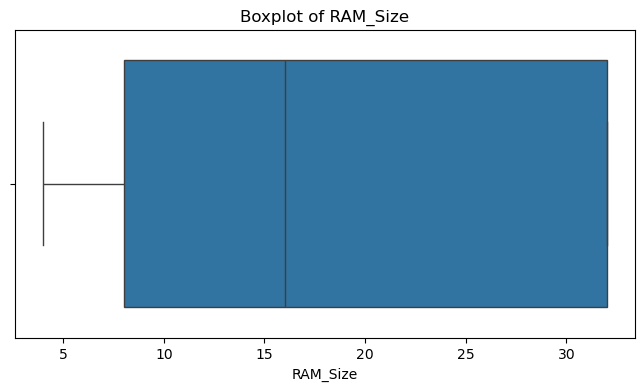

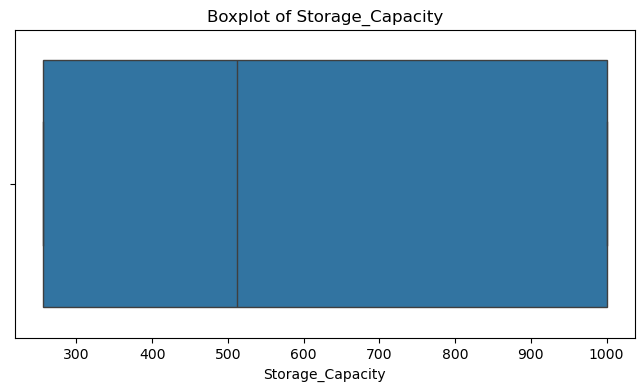

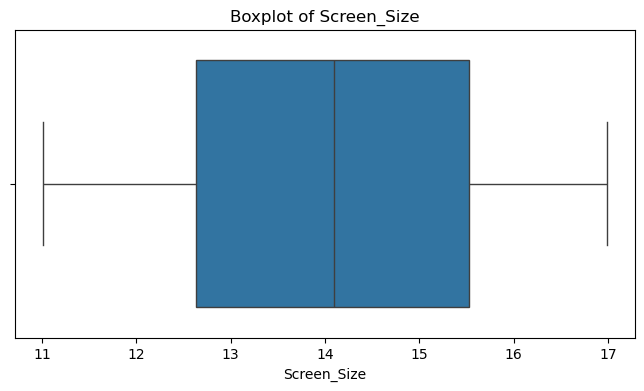

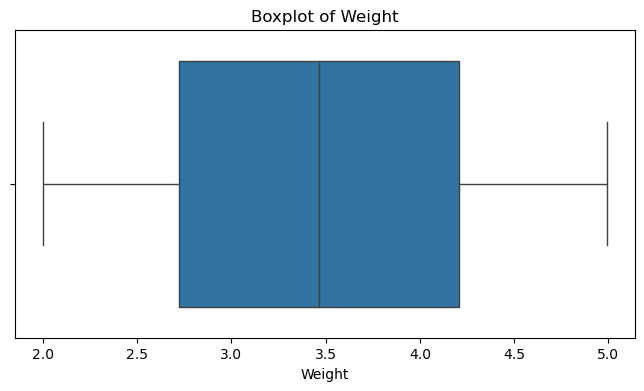

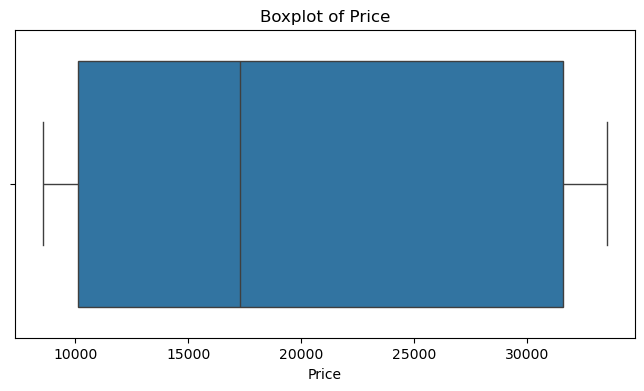

In [6]:
#4.
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Loop through the numerical columns and create boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))  # Set figure size for each boxplot
    sns.boxplot(x=df[col])  # Create the boxplot for the column
    plt.title(f"Boxplot of {col}")  # Add a title 


In [7]:
#5.
def remove_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with values outside the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Iterate over numerical columns to remove outliers
for col in numerical_cols:
    df = remove_outliers(df, col)

print(remove_outliers(df, col))

      Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16             512.0    11.185147   
1      Acer         2.912833         4            1000.0    11.311372   
2    Lenovo         3.241627         4             256.0    11.853023   
3      Acer         3.806248        16             512.0    12.280360   
4      Acer         3.268097        32            1000.0    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4            1000.0    12.587095   
996    Dell         2.780555         8             256.0    12.679356   
997    Dell         3.200569         4             512.0    12.666315   
998    Asus         1.604182         8             256.0    11.215581   
999  Lenovo         1.711980         4             256.0    16.561498   

       Weight         Price  
0    2.641094  17395.093060  
1    3.260012  31607.605920  
2    2.029061   9291.023542  
3  

In [8]:
#6.
import pandas as pd

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[((df[column] >= lower_bound) & (df[column] <= upper_bound)) | df[column].isna()]

# Load the dataset
df = pd.read_csv("Laptop_price.csv")  # Replace with your actual file path

# List of numerical columns to check for outliers
numerical_cols = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

# Print the shape before removing outliers
print("Shape before removing outliers:", df.shape)

# Remove outliers from each numerical column
for col in numerical_cols:
    df = remove_outliers(df.copy(), col)

# Print the shape after removing outliers
print("Shape after removing outliers:", df.shape)

Shape before removing outliers: (1000, 7)
Shape after removing outliers: (1000, 7)


In [9]:
#7.
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Laptop_price.csv")  # Replace with your actual file path

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Brand' column
df['Brand'] = label_encoder.fit_transform(df['Brand'])

# Print the first 5 rows to see the encoded values
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Brand   | Processor_Speed   | RAM_Size   | Storage_Capacity   | Screen_Size   | Weight   | Price   |
|:--------|:------------------|:-----------|:-------------------|:--------------|:---------|:--------|
| 1       | 3.8303            | 16         | 512                | 11.1851       | 2.64109  | 17395.1 |
| 0       | 2.91283           | 4          | 1000               | 11.3114       | 3.26001  | 31607.6 |
| 4       | 3.24163           | 4          | 256                | 11.853        | 2.02906  | 9291.02 |
| 0       | 3.80625           | 16         | 512                | 12.2804       | nan      | 17436.7 |
| 0       | 3.2681            | 32         | 1000               | 14.9909       | 4.19347  | 32918   |


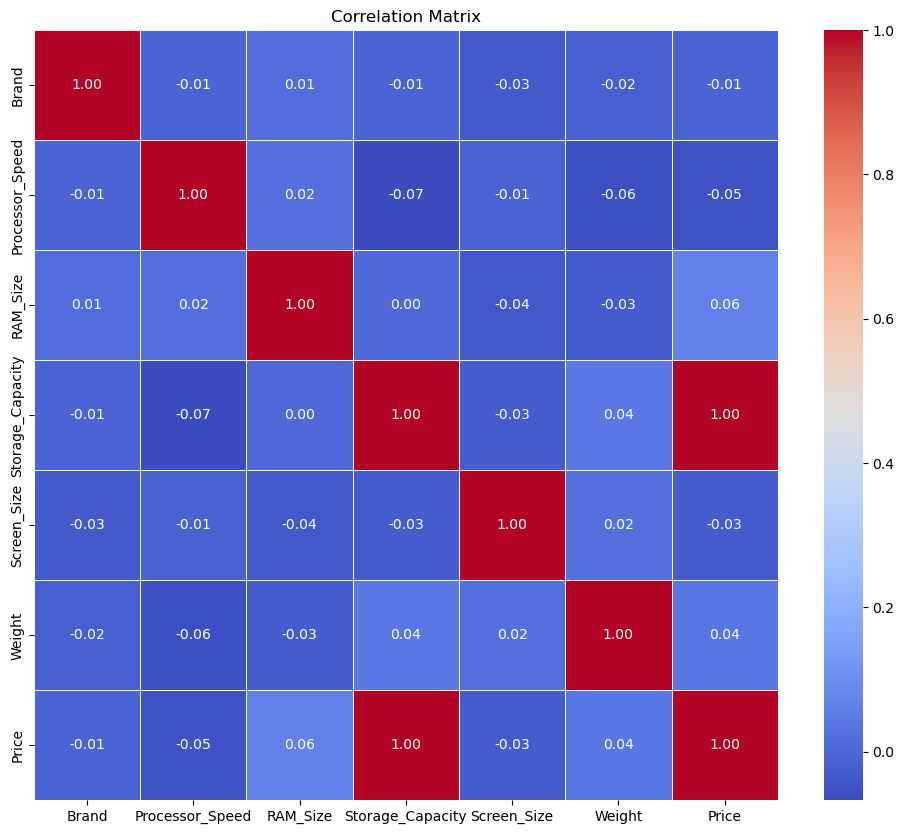

In [10]:
#8.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


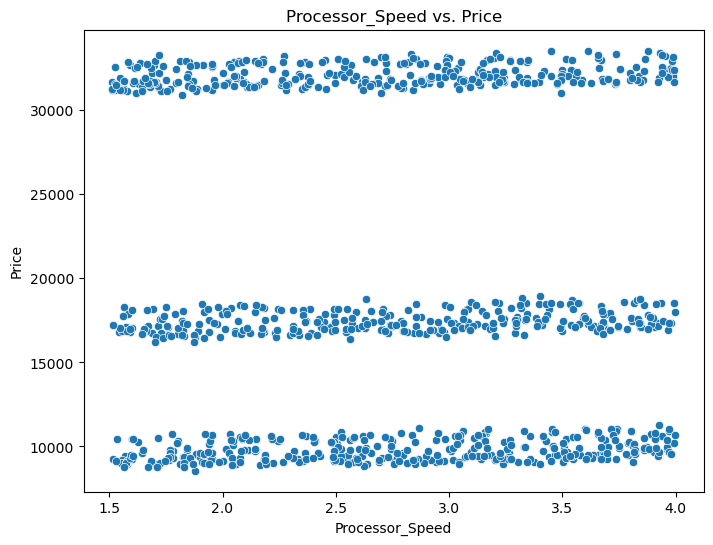

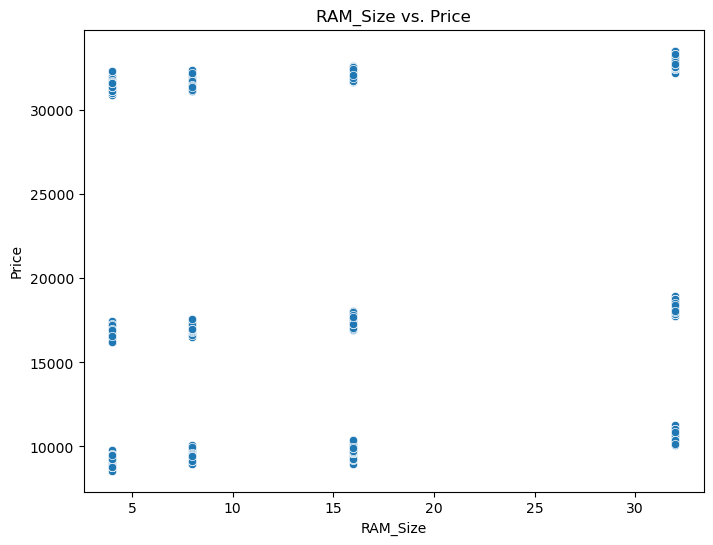

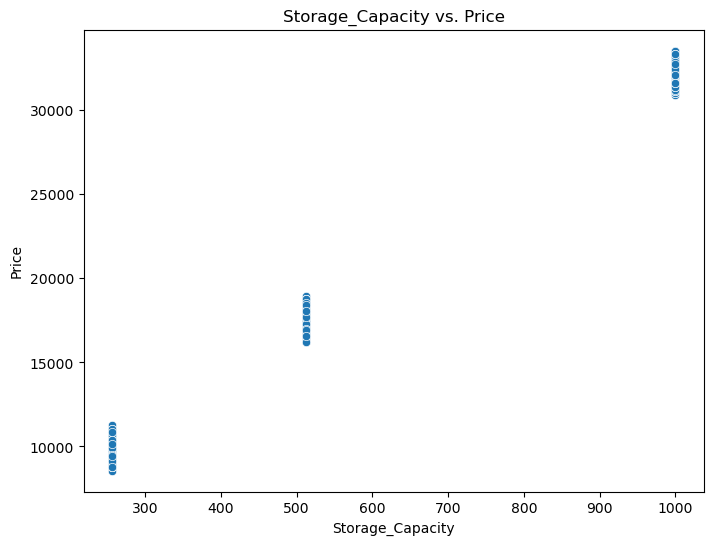

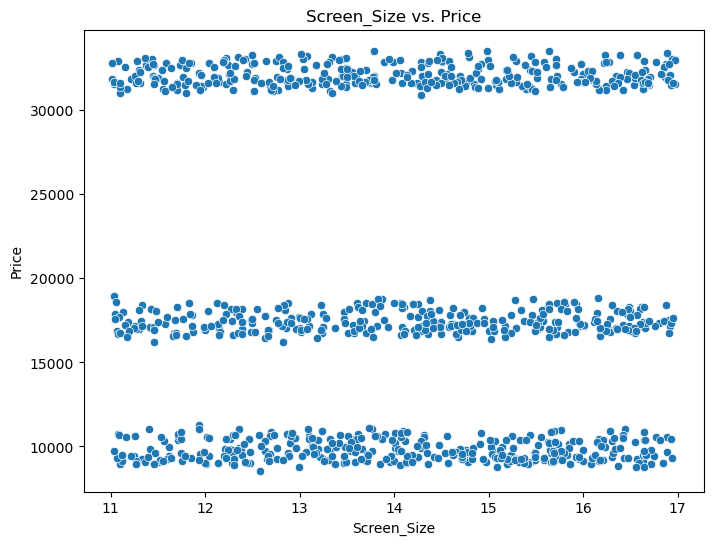

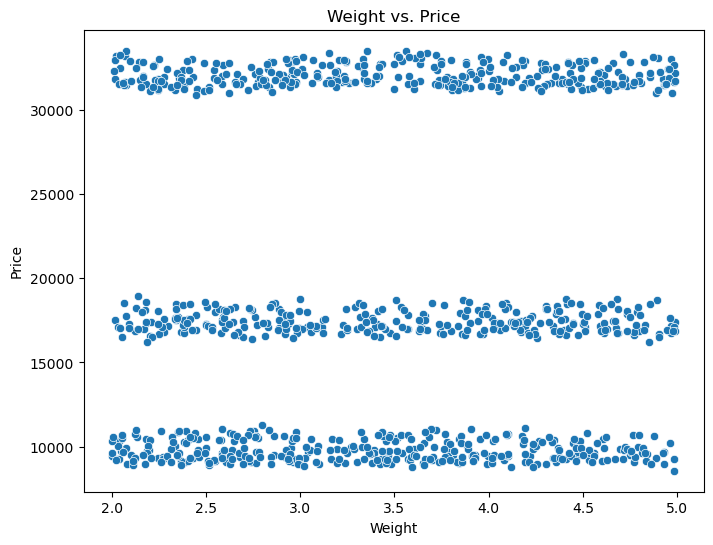

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Laptop_price.csv")  # Replace with your actual file path

# List of numerical columns (excluding 'Price')
numerical_cols = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']

# Create scatter plots for each numerical column against 'Price'
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Price', data=df)
    plt.title(f"{col} vs. Price")
    plt.show()

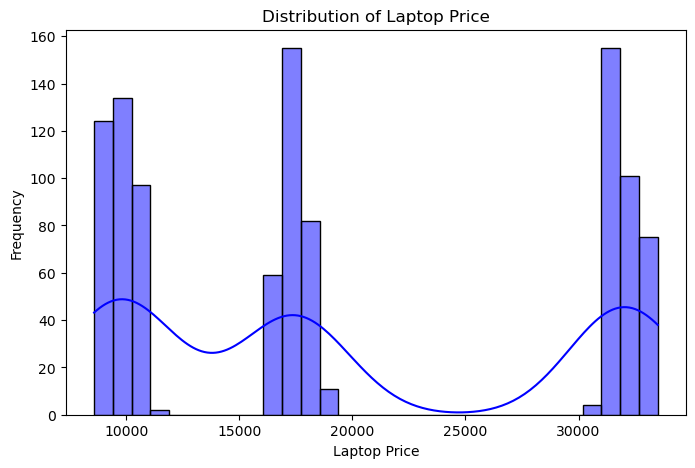

In [12]:
#9.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Laptop_price.csv")  # Replace with your actual file path

# Assuming you've already cleaned your data and stored it in df_cleaned (or df)
# If you haven't cleaned it yet, you can use the code from previous examples.

# Create a histogram of the 'Price' column
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Laptop Price")
plt.xlabel("Laptop Price")
plt.ylabel("Frequency")
plt.show()

In [13]:
import pandas as pd
# 10. Separate independent features and Target Variables
X = df.drop('Price', axis=1)
y = df['Price']

# Display the shapes of X and y
print("Shape of X (Independent Features):", X.shape)
print("Shape of y (Target Variable):", y.shape)

# Display the first 5 rows of X
print("\nFirst 5 rows of X:")
print(X.head())

# Display the first 5 values of y
print("\nFirst 5 values of y:")
print(y.head())


Shape of X (Independent Features): (1000, 6)
Shape of y (Target Variable): (1000,)

First 5 rows of X:
    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight
0    Asus         3.830296        16             512.0    11.185147  2.641094
1    Acer         2.912833         4            1000.0    11.311372  3.260012
2  Lenovo         3.241627         4             256.0    11.853023  2.029061
3    Acer         3.806248        16             512.0    12.280360       NaN
4    Acer         3.268097        32            1000.0    14.990877  4.193472

First 5 values of y:
0    17395.093060
1    31607.605920
2     9291.023542
3    17436.728330
4    32917.990720
Name: Price, dtype: float64


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your DataFrame of independent features

# Apply Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame to maintain column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the entire scaled DataFrame
print("Scaled X DataFrame:")
print(X_scaled_df)


Scaled X DataFrame:
     Brand_Encoded
0        -0.681111
1        -1.393570
2         1.456266
3        -1.393570
4        -1.393570
..             ...
995       0.743807
996       0.031348
997       0.031348
998      -0.681111
999       1.456266

[1000 rows x 1 columns]


Mean Squared Error: 90918806.65387833
R-squared: -0.0013464794675619451
Intercept: 19844.29875117954
Coefficient: [-100.66648037]
Predicted price for feature value 1: 19743.63227081242


C:\Users\NOKESH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


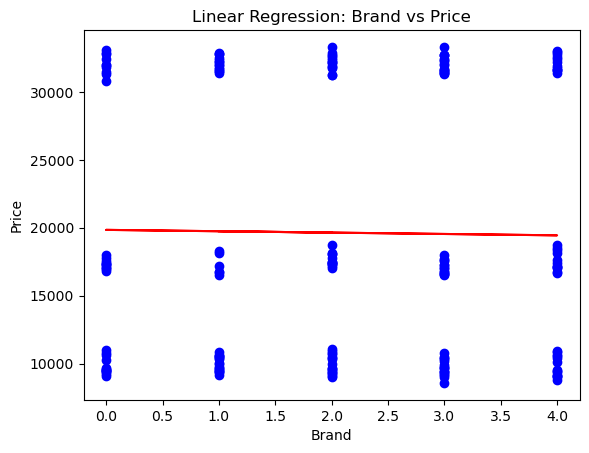

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load your data (replace 'Laptop_price_No_Missing_values.csv' with the actual path to your dataset)
data = pd.read_csv('Laptop_price_No_Missing_values.csv')

# 2. Convert 'Brand' column (categorical) into numeric values using LabelEncoder
label_encoder = LabelEncoder()
data['Brand'] = label_encoder.fit_transform(data['Brand'])

# 3. Select your feature (X) and target (y)
X = data[['Brand']]  # 'Brand' column now contains numeric values
y = data['Price']

# 4. Handle missing values (if any)
X = X.dropna()
y = y[X.index]  # align y to the new index of X after dropping NAs

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create a Linear Regression model
model = LinearRegression()

# 7. Train the model
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 10. Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 11. Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

# 12. Example prediction (replace with your desired value)
new_feature_value = [[1]]  # This would be the numeric encoding of a brand (e.g., 'Asus' -> 1)
predicted_price = model.predict(new_feature_value)
print(f"Predicted price for feature value {new_feature_value[0][0]}: {predicted_price[0]}")

# 13. Visualize the results (optional)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Linear Regression: Brand vs Price')
plt.show()


Mean Squared Error: 90918806.65387833
R-squared: -0.0013464794675619451
Intercept: 19844.29875117954
Coefficient: [-100.66648037]
Predicted price for Dell: 19642.9657904453


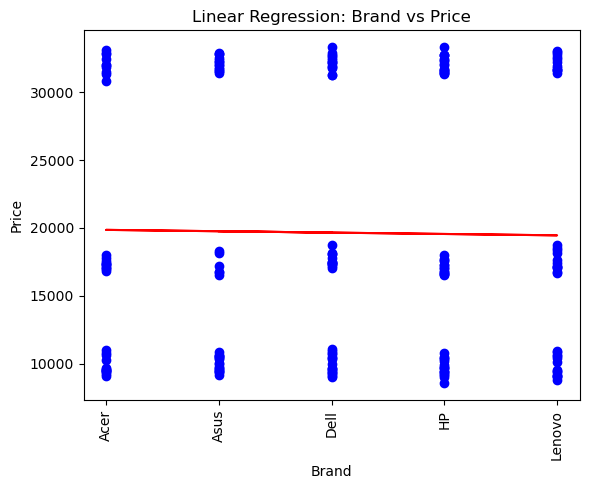

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import warnings


warnings.filterwarnings("ignore")
# 1. Load your data (replace 'Laptop_price_No_Missing_values.csv' with the actual path to your dataset)
data = pd.read_csv('Laptop_price_No_Missing_values.csv')

# 2. Convert 'Brand' column (categorical) into numeric values using LabelEncoder
label_encoder = LabelEncoder()
data['Brand_Encoded'] = label_encoder.fit_transform(data['Brand'])

# 3. Select your feature (X) and target (y)
X = data[['Brand_Encoded']]  # 'Brand_Encoded' column now contains numeric values
y = data['Price']

# 4. Handle missing values (if any)
X = X.dropna()
y = y[X.index]  # align y to the new index of X after dropping NAs

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create a Linear Regression model
model = LinearRegression()

# 7. Train the model
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 10. Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 11. Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

# 12. Example prediction (replace with your desired value)
# Find the numeric encoding for the desired brand
brand_name = 'Dell'  # Replace with the brand you want to predict
try:
    new_feature_value = [[label_encoder.transform([brand_name])[0]]]
    predicted_price = model.predict(new_feature_value)
    print(f"Predicted price for {brand_name}: {predicted_price[0]}")
except ValueError:
    print(f"Brand '{brand_name}' not found in the training data.")

# 13. Visualize the results (optional)
# Plotting using the actual brand names instead of numeric values
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')

# Set the x-ticks to show brand names
brand_names = label_encoder.inverse_transform(X_test['Brand_Encoded'])
unique_encoded_values = np.unique(X_test['Brand_Encoded'])
unique_brand_names = label_encoder.inverse_transform(unique_encoded_values)
plt.xticks(unique_encoded_values, unique_brand_names, rotation=90)

plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Linear Regression: Brand vs Price')
plt.show()